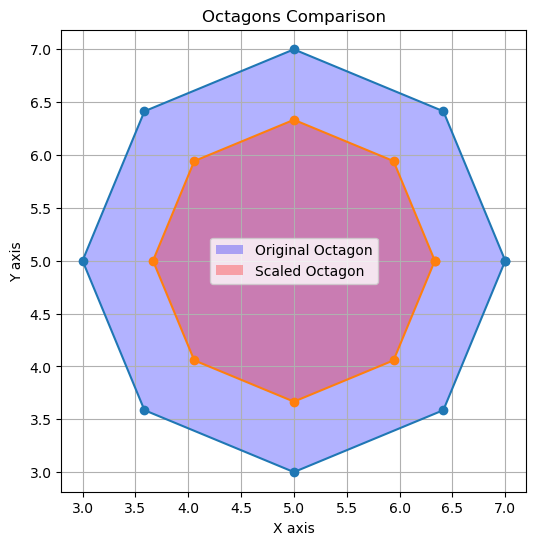

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_octagons(original_vertices, scaled_vertices):
    plt.figure(figsize=(6,6))
    
    plt.fill(*zip(*np.append(original_vertices, [original_vertices[0]], axis=0)), 'b', alpha=0.3, label='Original Octagon')
    plt.plot(*zip(*np.append(original_vertices, [original_vertices[0]], axis=0)), marker='o')
    
    
    plt.fill(*zip(*np.append(scaled_vertices, [scaled_vertices[0]], axis=0)), 'r', alpha=0.3, label='Scaled Octagon')
    plt.plot(*zip(*np.append(scaled_vertices, [scaled_vertices[0]], axis=0)), marker='o')
    
    plt.grid(True)
    plt.axis('equal')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Octagons Comparison')
    plt.legend()
    plt.show()


scaling_matrix = np.array([
    [1/1.5, 0],
    [0, 1/1.5]
])


regular_octagon_vertices = np.array([[7., 5.],
                                      [6.41421356, 6.41421356],
                                      [5., 7.],
                                      [3.58578644, 6.41421356],
                                      [3., 5.],
                                      [3.58578644, 3.58578644],
                                      [5., 3.],
                                      [6.41421356, 3.58578644]])


centroid = np.mean(regular_octagon_vertices, axis=0)


scaled_octagon_vertices = (regular_octagon_vertices - centroid) @ scaling_matrix + centroid


plot_octagons(regular_octagon_vertices, scaled_octagon_vertices)


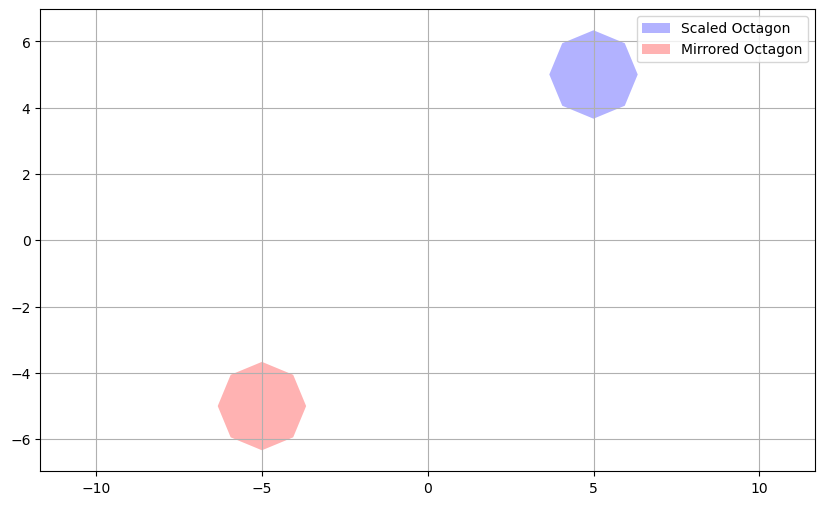

In [2]:
def to_homogeneous(vertices):
    return np.hstack([vertices, np.ones((vertices.shape[0], 1))])


def apply_transformation(vertices, matrix):
    transformed = np.dot(vertices, matrix.T)
    return transformed[:, :2] / transformed[:, [2]]


mirrored_oct = np.array([
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])



homogeneous_vertices = to_homogeneous(scaled_octagon_vertices)


mirrored_vertices = apply_transformation(homogeneous_vertices, mirrored_oct)


plt.figure(figsize=(10, 6))
plt.fill(*zip(*np.append(scaled_octagon_vertices, [scaled_octagon_vertices[0]], axis=0)), 'b', alpha=0.3, label='Scaled Octagon')
plt.fill(*zip(*np.append(mirrored_vertices, [mirrored_vertices[0]], axis=0)), 'r', alpha=0.3, label='Mirrored Octagon')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


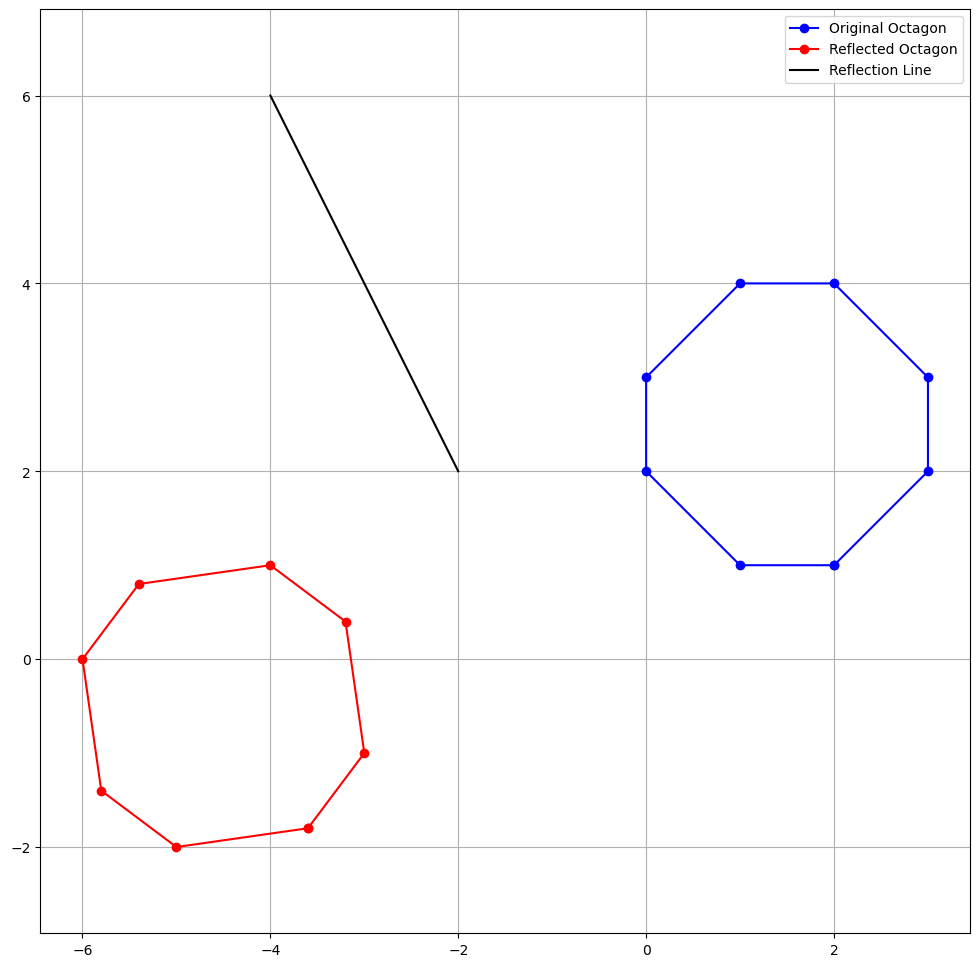

In [3]:


def plot_step_by_step(polygons, line_points, labels, colors, line_label):
    plt.figure(figsize=(12, 12))
    for poly, label, color in zip(polygons, labels, colors):
        plt.plot(*np.append(poly, [poly[0]], axis=0).T, marker='o', color=color, label=label)
    plt.plot(*line_points.T, color='black', label=line_label)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

def reflect_polygon(polygon, P1, P2):
    dx, dy = P2 - P1
    angle = np.arctan2(dy, dx)
    
    
    translate_to_origin = np.array([[1, 0, -P1[0]], [0, 1, -P1[1]], [0, 0, 1]])
    rotate = np.array([[np.cos(-angle), -np.sin(-angle), 0], [np.sin(-angle), np.cos(-angle), 0], [0, 0, 1]])
    reflect = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    rotate_back = np.linalg.inv(rotate)
    translate_back = np.linalg.inv(translate_to_origin)
    
  
    transformation_matrix = translate_back @ rotate_back @ reflect @ rotate @ translate_to_origin
    polygon_homogeneous = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    reflected_polygon_homogeneous = (transformation_matrix @ polygon_homogeneous.T).T
    
    return reflected_polygon_homogeneous[:, :2]


octagon = np.array([[2, 1], [3, 2], [3, 3], [2, 4], [1, 4], [0, 3], [0, 2], [1, 1]])
P1 = np.array([-2, 2])
P2 = np.array([-4, 6])


reflected_octagon = reflect_polygon(octagon, P1, P2)


line_points = np.array([P1, P2])
plot_step_by_step([octagon, reflected_octagon], line_points, ['Original Octagon', 'Reflected Octagon'], ['blue', 'red'], 'Reflection Line')


In [4]:
def calculate_centroid(polygon):
    return np.mean(polygon, axis=0)
    
def scale_polygon_around_centroid(polygon, scale_factor):
    centroid = calculate_centroid(polygon)
    return scale_polygon(polygon - centroid, scale_factor) + centroid
    
def plot_polygons_with_line(polygons, labels, colors, line_points, line_label):
    plt.figure(figsize=(10, 10))
    for poly, label, color in zip(polygons, labels, colors):
        plt.plot(*np.append(poly, [poly[0]], axis=0).T, marker='o', color=color, label=label)
    if line_points is not None:
        plt.plot(*line_points.T, color='black', linestyle='--', label=line_label)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()


polygon = pd.read_csv("C:/points.txt", header=None, sep='\t').values


def reflect_polygon_origin(polygon):
    reflection_matrix = np.array([[-1, 0], [0, -1]])
    return np.dot(polygon, reflection_matrix)


def plot_polygons(polygons, labels, colors, line_label):
    plt.figure(figsize=(10, 10))
    for poly, label, color in zip(polygons, labels, colors):
        plt.plot(*np.append(poly, [poly[0]], axis=0).T, marker='o', color=color, label=label)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()


scaled_polygon = scale_polygon_around_centroid(polygon, 0.5)
reflected_scaled_polygon = reflect_polygon_origin(scaled_polygon)
reflected_polygon = reflect_polygon(polygon, P1, P2)


line_points = np.array([P1, P2])


plot_polygons_with_line([polygon, scaled_polygon, reflected_scaled_polygon, reflected_polygon],
                        ['Original', 'Scaled', 'Scaled & Reflected (Origin)', 'Reflected (Line)'],
                        ['blue', 'green', 'red', 'purple'],
                        line_points,
                        'Reflection Line')


NameError: name 'scale_polygon' is not defined